<a href="https://colab.research.google.com/github/HarshithaM604/Python-with-Datascience-Projects/blob/main/Image_Classification_Using_scikit_learn_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import pandas as pd
from skimage.io import imread
from skimage.transform import resize
from PIL import Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
input_dir='/content/drive/MyDrive/train'

In [ ]:
categories=['cats','dogs']
for category in categories:
  for file in os.listdir(os.path.join(input_dir,category)):
    img_path=os.path.join(input_dir,category,file)
    print(img_path)

/content/drive/MyDrive/train/cats/cat.0.jpg
/content/drive/MyDrive/train/cats/cat.1.jpg
/content/drive/MyDrive/train/cats/cat.10.jpg
/content/drive/MyDrive/train/cats/cat.145.jpg
/content/drive/MyDrive/train/cats/cat.140.jpg
/content/drive/MyDrive/train/cats/cat.142.jpg
/content/drive/MyDrive/train/cats/cat.141.jpg
/content/drive/MyDrive/train/cats/cat.139.jpg
/content/drive/MyDrive/train/cats/cat.14.jpg
/content/drive/MyDrive/train/cats/cat.137.jpg
/content/drive/MyDrive/train/cats/cat.138.jpg
/content/drive/MyDrive/train/cats/cat.134.jpg
/content/drive/MyDrive/train/cats/cat.135.jpg
/content/drive/MyDrive/train/cats/cat.136.jpg
/content/drive/MyDrive/train/cats/cat.132.jpg
/content/drive/MyDrive/train/cats/cat.133.jpg
/content/drive/MyDrive/train/cats/cat.131.jpg
/content/drive/MyDrive/train/cats/cat.13.jpg
/content/drive/MyDrive/train/cats/cat.128.jpg
/content/drive/MyDrive/train/cats/cat.127.jpg
/content/drive/MyDrive/train/cats/cat.129.jpg
/content/drive/MyDrive/train/cats/cat.130

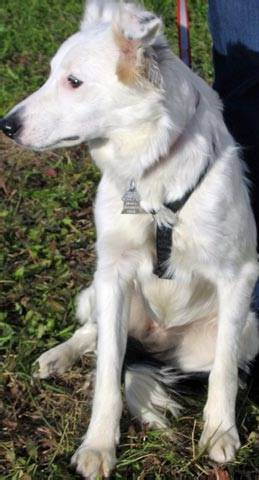

In [ ]:
Image.open("/content/drive/MyDrive/train/dogs/dog.108.jpg")

In [ ]:
img_path="/content/drive/MyDrive/train/dogs/dog.108.jpg"
img=imread(img_path)
print(img)

[[[ 50  73  31]
  [ 46  69  27]
  [ 50  73  31]
  ...
  [ 47  64 110]
  [ 46  62 111]
  [ 45  61 110]]

 [[ 48  71  29]
  [ 45  68  26]
  [ 49  72  30]
  ...
  [ 46  63 109]
  [ 45  62 108]
  [ 44  60 109]]

 [[ 47  70  26]
  [ 45  68  24]
  [ 50  73  29]
  ...
  [ 45  62 106]
  [ 44  61 105]
  [ 43  60 106]]

 ...

 [[ 68  76  35]
  [ 78  86  47]
  [ 82  90  53]
  ...
  [ 28  24  15]
  [ 27  21   9]
  [ 55  48  38]]

 [[ 80  89  44]
  [ 89  98  55]
  [ 95 103  62]
  ...
  [ 44  40  29]
  [ 43  37  23]
  [ 70  64  52]]

 [[ 90  99  52]
  [ 95 104  59]
  [ 96 105  62]
  ...
  [ 45  41  30]
  [ 42  36  22]
  [ 68  62  48]]]


In [ ]:
img=resize(img,(15,15))
img

array([[[0.26390669, 0.34292259, 0.16438133],
        [0.26510639, 0.35526504, 0.16190349],
        [0.26525653, 0.34318987, 0.16033851],
        [0.31609394, 0.37766377, 0.21109781],
        [0.48059155, 0.52593928, 0.4231878 ],
        [0.77438956, 0.78319059, 0.8038807 ],
        [0.79214703, 0.78232367, 0.79458408],
        [0.73182561, 0.71114959, 0.71169413],
        [0.54290637, 0.55779835, 0.52603251],
        [0.34986801, 0.37970178, 0.28486761],
        [0.40637482, 0.34716911, 0.28815549],
        [0.27793433, 0.3271362 , 0.20656448],
        [0.17544438, 0.24309674, 0.31281084],
        [0.18589964, 0.25562774, 0.40330182],
        [0.1907531 , 0.26747799, 0.42152589]],

       [[0.25515455, 0.32368454, 0.16004127],
        [0.27662609, 0.33043479, 0.17075813],
        [0.32405283, 0.37487998, 0.22970463],
        [0.59016907, 0.61447351, 0.55011231],
        [0.81011978, 0.81068954, 0.81032446],
        [0.90888776, 0.90441564, 0.91974412],
        [0.85939462, 0.81913246,

In [ ]:
img=img.flatten()

In [ ]:
data=[]
labels=[]
for category_idx, category in enumerate(categories):
  for file in os.listdir(os.path.join(input_dir,category)):
    img_path=os.path.join(input_dir,category,file)
    img=imread(img_path)
    img=resize(img,(15,15))
    data.append(img.flatten())
    labels.append(category_idx)

In [ ]:
labels=np.asarray(labels)
data=np.asarray(data)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data,labels,test_size=0.2,shuffle=True, stratify=labels)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
accuracy_score(y_test,y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.5897435897435898

In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
accuracy_score(y_test,y_pred)

0.5666666666666667

In [ ]:
#Random  Forest
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=1000)
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)
accuracy_score(y_test,y_pred)

0.6384615384615384

In [ ]:
#Hyperparameter Tuning-RF
from sklearn.model_selection import GridSearchCV
rfc=RandomForestClassifier(random_state=42)
param_grid={
    'n_estimators':[200,500],
    'max_features':['auto','sqrt','log2'],
    'max_depth':[4,5,6,7,8],
    'criterion':['gini','entropy']
}
CV_rfc=GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(x_train,y_train)
CV_rfc.best_params_
rfc1=RandomForestClassifier(random_state=42,max_features='auto',n_estimators=200,max_depth=8,criterion='gini')
rfc1.fit(x_train,y_train)
pred=rfc1.predict(x_test)
print("Accuracy for random forest on data: ",accuracy_score(y_test,pred))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Accuracy for random forest on data:  0.6256410256410256


In [ ]:
pd.DataFrame({'Actual_Value':y_test,"Predicted_Value":y_pred})

,Actual_Value,Predicted_Value
0,0,0
1,1,1
2,1,1
3,1,0
4,0,0
...,...,...
385,0,0
386,1,1
387,0,1
388,1,0
